# kmeans clustering
clustering the majority class before classification so that the dataset is more balanced

In [57]:
# data
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

# machine learning
from sklearn.cluster import KMeans

# evaluation
from sklearn import metrics
from collections import Counter

## data

In [2]:
df = pd.read_csv('../data/combined_feng.csv', index_col=0)
df.shape

(3000, 7353)

In [3]:
# get data
X = df.drop(columns='female_led')
y = df['female_led']

In [4]:
y.value_counts()

0    2858
1     142
Name: female_led, dtype: int64

In [5]:
# only take X that belongs to the majority class
X = X[y==0]
X.shape

(2858, 7352)

## machine learning

In [6]:
# test out multiple k-values
inertias = []
K = range(1, 10)
 
for k in K:
    mdl = KMeans(n_clusters=k).fit(X)
    inertias.append(mdl.inertia_)

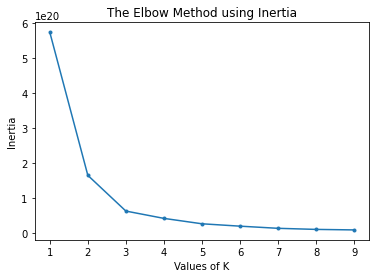

In [7]:
# elbow plot
plt.plot(K, inertias, '.-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, the optimal number of clusters for the data is 3.

In [10]:
k=3
mdl = KMeans(n_clusters=k).fit(X)

In [11]:
X['kmeans']=mdl.labels_

In [12]:
X['kmeans'].value_counts()

2    2836
0      21
1       1
Name: kmeans, dtype: int64

Even though `k=3` is the optimal based on elbow plot, the classification is still extremely imbalanced.

### plot cluster features

In [44]:
def scat(x_col='Trend Score (7 Days)', 
         y_col='last_funding_amount_usd', 
         c_col='kmeans'):
    plt.figure(figsize=(10,7))
    plt.scatter(x = X[x_col], y = X[y_col], c = X[c_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col) 

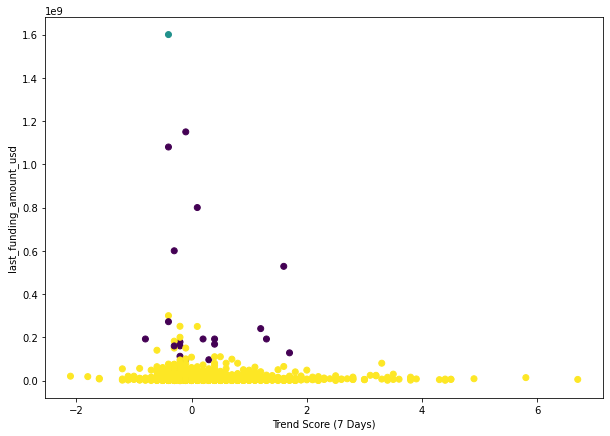

In [14]:
scat(x_col, y_col)

### evaluate classification distribution

In [8]:
def class_dist(k):
    mdl = KMeans(n_clusters=k).fit(X)
    return Counter(mdl.labels_)

In [9]:
class_dist(3)

Counter({1: 1, 2: 21, 0: 2836})

In [23]:
# test out multiple k-values
distribution = {}
K = range(1, 10)
 
for k in K:
    distribution[k] = class_dist(k)

In [36]:
dist_df = pd.DataFrame.from_dict(distribution)

,1,2,3,4,5,6,7,8,9
0,2858.0,2857.0,2838.0,2835.0,2785.0,10.0,2612.0,2570.0,2570
1,NaN,1.0,1.0,1.0,1.0,2794.0,1.0,1.0,1
2,NaN,NaN,19.0,21.0,14.0,1.0,31.0,9.0,7
3,NaN,NaN,NaN,1.0,1.0,1.0,4.0,10.0,1
4,NaN,NaN,NaN,NaN,57.0,48.0,9.0,231.0,231
5,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,3
6,NaN,NaN,NaN,NaN,NaN,NaN,200.0,3.0,10
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,33
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [41]:
dist_df = dist_df.T
dist_df.reset_index(inplace=True)
dist_df

,index,0,1,2,3,4,5,6,7,8
0,1,2858.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2857.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2838.0,1.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2835.0,1.0,21.0,1.0,NaN,NaN,NaN,NaN,NaN
4,5,2785.0,1.0,14.0,1.0,57.0,NaN,NaN,NaN,NaN
5,6,10.0,2794.0,1.0,1.0,48.0,4.0,NaN,NaN,NaN
6,7,2612.0,1.0,31.0,4.0,9.0,1.0,200.0,NaN,NaN
7,8,2570.0,1.0,9.0,10.0,231.0,1.0,3.0,33.0,NaN
8,9,2570.0,1.0,7.0,1.0,231.0,3.0,10.0,33.0,2.0


<AxesSubplot:xlabel='index'>

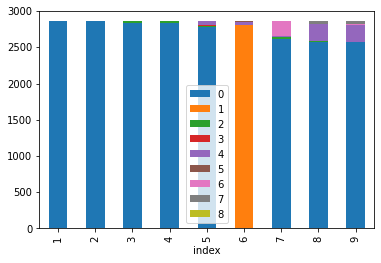

In [42]:
dist_df.plot(x='index', kind='bar', stacked=True)

Even when the number of clusters increase, the imbalanced situation persists.

In [45]:
k=10
c_col = f'kmeans{k}'
mdl = KMeans(n_clusters=k).fit(X)
X[c_col]=mdl.labels_

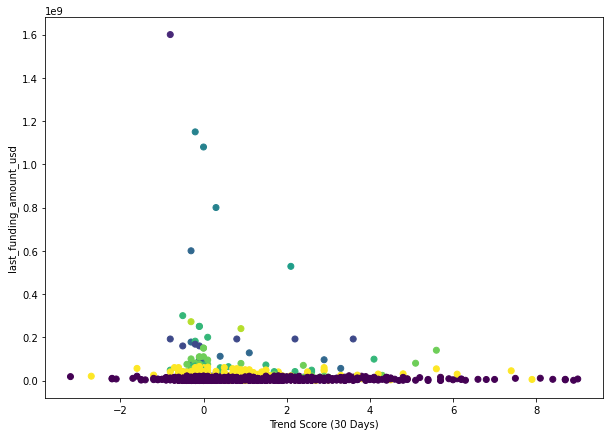

In [62]:
x_col = 'Trend Score (30 Days)'
scat(x_col, y_col, c_col)

The reason seems to be that the cluster is based heavily on the last funding amount. Also because the majority of the matrix is extremely sparse. Might be useful to densify the matrix with dimensionlaity reduction tools before clustering again.